# Caso de estudio sobre la evaluación de modelos usando las métricas fundamentales

In [1]:
import pandas as pd
import numpy as np
import pickle
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df_reg = pd.read_csv("./datasets/titanic_regression.csv")
df_reg.head()

,Fare,class_ticket__2,class_ticket__3
0,7.2500,0,1
1,71.2833,0,0
2,7.9250,0,1
3,53.1000,0,0
4,8.0500,0,1


In [3]:
df_clf = pd.read_csv('./datasets/titanic_classification.csv')
df_clf.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Emb_C,Emb_Q,Emb_S,Survived
0,3,0,22.0,1,0,7.2500,0,0,1,0
1,1,0,38.0,1,0,71.2833,1,0,0,1
2,3,0,26.0,0,0,7.9250,0,0,1,1
3,1,0,35.0,1,0,53.1000,0,0,1,1
4,3,0,35.0,0,0,8.0500,0,0,1,0


In [4]:
with open("./saved_models/titanic_regression.pkl", 'rb') as f:
    reg = pickle.load(f)

with open("./saved_models/random_forest_clf.pkl","rb") as f:
    rf = pickle.load(f)

Importando las metricas para evaluar los modelos de regresión

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

Usemos el modelo de regresión cargado para predecir los valores del conjunto de datos.

In [6]:
X = df_reg.drop(columns=["Fare"])
y = df_reg['Fare'].values
y_pred = reg.predict(X)

Ahora con los valores que fueron predecidos calculamos algunas de las métricas

In [7]:
print('Mean Absolute Error = {}'.format(mean_absolute_error(y, y_pred)))
print('Root Mean Squared Error = {}'.format(sqrt(mean_squared_error(y,
y_pred))))
print('R Squared Score = {}'.format(r2_score(y, y_pred)))

Mean Absolute Error = 19.628101662449893
Root Mean Squared Error = 41.28596607888486
R Squared Score = 0.36324718649102006


### Clasificación

In [8]:
from sklearn.metrics import (accuracy_score, confusion_matrix, precision_score,recall_score, f1_score)

In [9]:
X = df_clf.iloc[:, :-1]
y = df_clf.iloc[:, -1]

y_pred = rf.predict(X)
y_pred_probs = rf.predict_proba(X)[:, 1]

In [10]:
print('Accuracy Score = {}'.format(accuracy_score(y, y_pred)))

Accuracy Score = 0.7474747474747475


In [11]:
print(confusion_matrix(y_pred=y_pred, y_true=y))

[[497  52]
 [173 169]]


In [12]:
print('Precision Score = {}'.format(precision_score(y, y_pred)))
print('Recall Score = {}'.format(recall_score(y, y_pred)))

Precision Score = 0.7647058823529411
Recall Score = 0.49415204678362573


In [13]:
print('F1 Score = {}'.format(f1_score(y, y_pred)))

F1 Score = 0.6003552397868561


Graficando el Área debajo de la Curva ROC

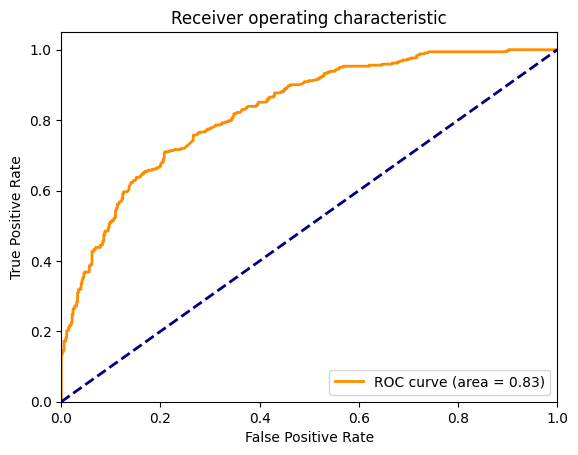

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y.values, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()